# Project 3: Poisonous mushrooms

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 observations, where each mushroom is described by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. Since all the observations are categorical, I've binarized the feature space. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using KMeans and density estimation with Gaussian Mixture Models. Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [46]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from matplotlib.colors import LogNorm

Load feature names.

In [47]:
feature_names = []
with open('../Data/mushroom.map') as fmap:
    for line in fmap:
        [index, name, junk] = line.split()
        feature_names.append(name)

print ('Loaded feature names:', len(feature_names))

Loaded feature names: 126


Load data. The data is sparse in the input file, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [48]:
X, Y = [], []

with open('../Data/mushroom.data') as fdata:
    for line in fdata:
        items = line.split()
        Y.append(int(items.pop(0)))
        x = np.zeros(len(feature_names))
        for item in items:
            feature = int(item.split(':')[0])
            x[feature] = 1
        X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print (train_data.shape, test_data.shape)

(7000, 126) (1124, 126)


(1) Run Principal Components Analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 50].

In [49]:
def P1():
### STUDENT START ###
    #loop through 1-50
    #fit PCA on train_data and report explained variance ratio
    for i in range(50):
        pca = PCA(n_components = i+1)
        pca.fit(train_data, train_labels)
        print('{} components; fraction of variance explained = {}'.format(i+1, sum(pca.explained_variance_ratio_)))
### STUDENT END ###

P1()

1 components; fraction of variance explained = 0.16404331279334194
2 components; fraction of variance explained = 0.2972781014878146
3 components; fraction of variance explained = 0.39901266670928026
4 components; fraction of variance explained = 0.46964623105913883
5 components; fraction of variance explained = 0.508312694566165
6 components; fraction of variance explained = 0.5451207376410563
7 components; fraction of variance explained = 0.5764031286677327
8 components; fraction of variance explained = 0.6037405021952122
9 components; fraction of variance explained = 0.6299054068842979
10 components; fraction of variance explained = 0.6522148325627504
11 components; fraction of variance explained = 0.6726965620994331
12 components; fraction of variance explained = 0.6913798686903649
13 components; fraction of variance explained = 0.7087240890195737
14 components; fraction of variance explained = 0.7255676954765468
15 components; fraction of variance explained = 0.7407558834237287
16

(2) PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and plot it. Show the positive (poisonous) cases in blue and the negative (non-poisonous) in red. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

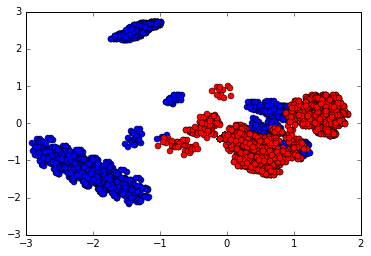

In [50]:
#run PCA to transform data into 2d
pca = PCA(n_components = 2 )
train_2d = pca.fit_transform(train_data)

def P2():
### STUDENT START ###
    #plot the data in blue and red as instructed
    train_2d_p = train_2d[train_labels==1]
    train_2d_np = train_2d[train_labels==0]
    plt.plot(train_2d_p[:,0],train_2d_p[:,1], 'bo', train_2d_np[:,0], train_2d_np[:,1], 'ro')
    plt.show()
### STUDENT END ###

P2()

(3) Run KMeans with [1,16] clusters over the 2d projected data. Mark each centroid cluster and plot a circle that goes through the most distant point assigned to each cluster.

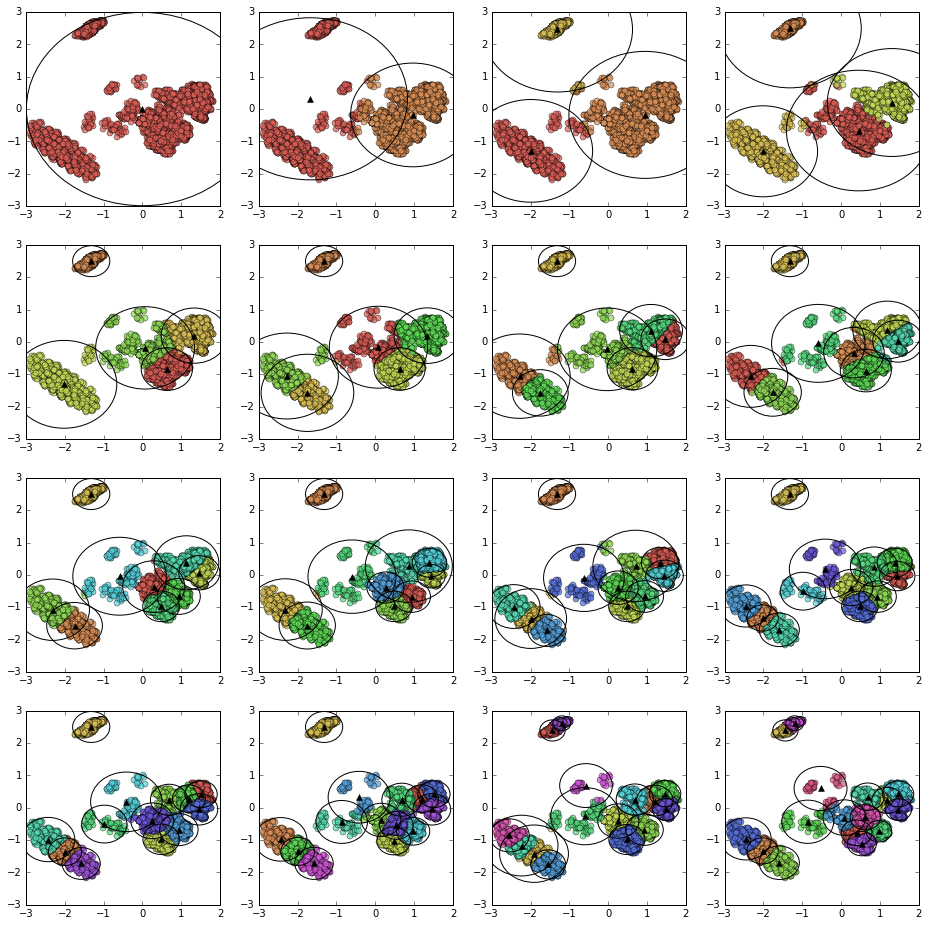

In [51]:
def P3():
### STUDENT START ###
    #color scheme generated by seaborn package
    c = [(0.86, 0.37119999999999997, 0.33999999999999997), (0.86, 0.56619999999999993, 0.33999999999999997), 
             (0.86, 0.7612000000000001, 0.33999999999999997), (0.76380000000000003, 0.86, 0.33999999999999997), 
             (0.56880000000000008, 0.86, 0.33999999999999997), (0.37380000000000008, 0.86, 0.33999999999999997), 
             (0.33999999999999997, 0.86, 0.50120000000000009), (0.33999999999999997, 0.86, 0.69620000000000015), 
             (0.33999999999999997, 0.82879999999999987, 0.86), (0.33999999999999997, 0.63379999999999981, 0.86), 
             (0.33999999999999997, 0.43879999999999986, 0.86), (0.43619999999999975, 0.33999999999999997, 0.86), 
             (0.63119999999999976, 0.33999999999999997, 0.86), (0.82619999999999982, 0.33999999999999997, 0.86), 
             (0.86, 0.33999999999999997, 0.69879999999999964), (0.86, 0.33999999999999997, 0.50379999999999958)]
    
    plt.figure(figsize = (16,16))
    #loop through [1,16]
    for j in range(16):
        #for each loop, run KMeans and fit the data
        km = KMeans(j+1)
        km.fit(train_2d)
        train_km = km.transform(train_2d)
        train_cluster = km.predict(train_2d)

        fig=plt.gcf()
        ax = plt.subplot(4,4,j+1)
        #gca()
        ax.cla()
        ax.set_xlim((-3,2))
        ax.set_ylim((-3,3))
        
        #loop through each cluster
        for i in range(j+1):
            #plot clusters
            ax.plot(train_2d[train_cluster==i][:,0],train_2d[train_cluster==i][:,1],color = c[i], 
                    marker = 'o', ls = 'none', zorder=0, alpha=0.7)
            #draw circles
            if len(train_km[train_cluster == i]) > 0:
                #radius = distance between center and furtherest point in cluster
                m_dist = np.max(train_km[train_cluster == i][:,i])
                fig.gca().add_artist(plt.Circle(km.cluster_centers_[i], m_dist, color='black',fill=False))
                
                #mark the centers as black triangle
                ax.plot(km.cluster_centers_[i][0],km.cluster_centers_[i][1], 'k^')
        fig.savefig('circle1.png', dpi=90, bbox_inches='tight')
### STUDENT END ###

P3()

(4) Fit a Gaussian Mixture Model for the positive examples in your 2d projected data. Plot the estimated density contours as shown here: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py. Vary the number of mixture components from 1-4 and the covariance matrix type ('spherical', 'diag', 'tied', 'full').

C:\Users\etbear\Anaconda3\lib\site-packages\matplotlib\contour.py:1542: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


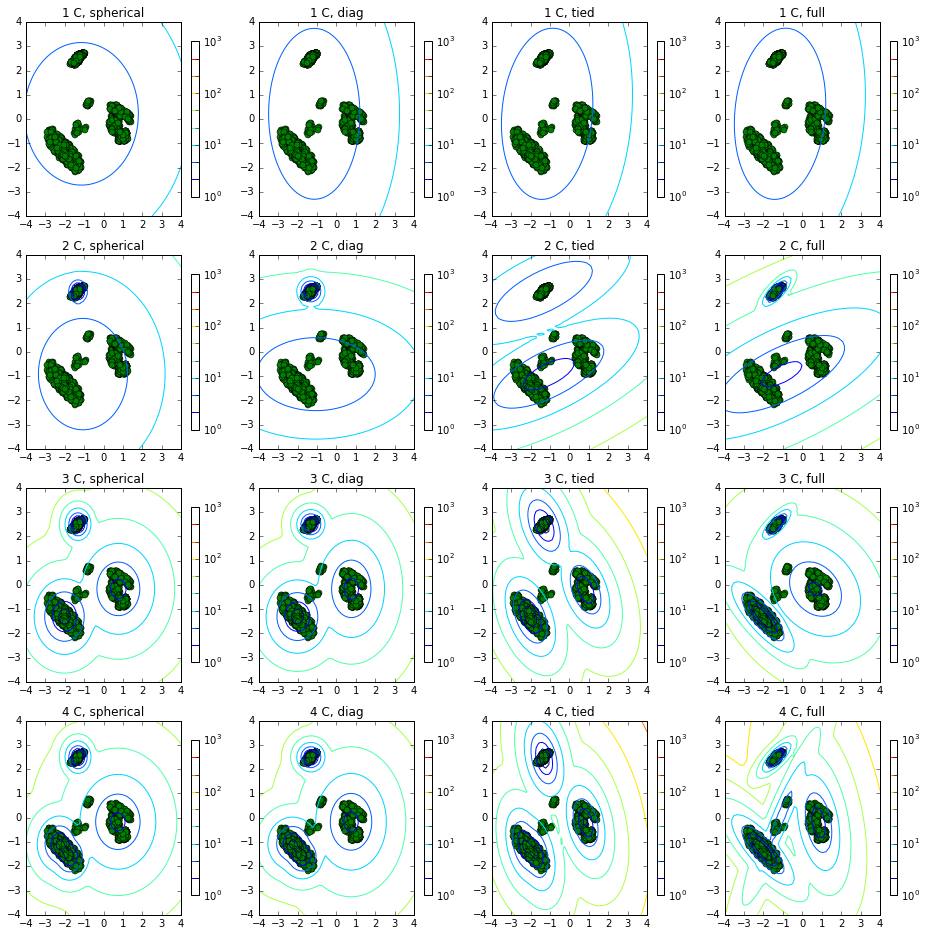

In [52]:
def P4():
### STUDENT START ###
    #initialize variables
    cv = ('spherical', 'diag', 'tied', 'full')
    mc = 4
    train_2d_p = train_2d[train_labels==1]
    train_labels_p = train_labels[train_labels==1]
    
    plt.figure(figsize = (16,16))
    
    #loop through mixture component/covariange matrix type combinations
    for i in range(mc):
        for j in range(4):
            #fit GMM for each combination
            gmm = GMM(i+1, cv[j])
            gmm.fit(train_2d_p, train_labels_p)

            ax = plt.subplot(4,4,i*4+j+1)
            ax.set_xlim((-4,4))
            ax.set_ylim((-4,4))
            
            # display predicted scores by the model as a contour plot
            x = np.linspace(-4, 4)
            y = np.linspace(-4, 4)
            X, Y = np.meshgrid(x, y)
            XX = np.array([X.ravel(), Y.ravel()]).T
            Z = -gmm.score_samples(XX)[0]
            Z = Z.reshape(X.shape)

            CS = ax.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                             levels=np.logspace(0, 3, 10))
            CB = plt.colorbar(CS, shrink=0.8, extend='both')
            ax.plot(train_2d_p[:, 0], train_2d_p[:, 1], 'go', zorder = 0)

            plt.title('{} C, {}'.format(i+1, cv[j]))
            
    #note 'spherical' have circular contours
    #'tied' produces contours of same shapes
    #'full produces contours with more variability, obtaining better accuracy by using more parameters
    plt.show()
### STUDENT END ###

P4()

(5) Fit two 4-component full covariance GMMs, one for the positive examples and one for the negative examples in your 2d projected data. Predict the test examples by choosing the label for which the model gives a larger probability (use GMM.score). What is the accuracy?

In [53]:
def P5():
### STUDENT START ###
    #run PCA and trnasform data
    pca = PCA(n_components = 2)
    train_2d = pca.fit_transform(train_data)
    
    train_2d_p = train_2d[train_labels==1]
    train_labels_p = train_labels[train_labels==1]
    train_2d_n = train_2d[train_labels==0]
    train_labels_n = train_labels[train_labels==0]

    test_2d = pca.transform(test_data)
    
    #fit GMM for positive and negative examples
    gmm_p = GMM(4, 'full')
    gmm_n = GMM(4, 'full')
    
    gmm_p.fit(train_2d_p, train_labels_p)
    gmm_n.fit(train_2d_n, train_labels_n)
    
    #use GMM to predict scores on test data
    score_p = gmm_p.score(test_2d)
    score_n = gmm_n.score(test_2d)
    
    #make prediction based on scores
    test_predict = score_p > score_n
    print("Accuracy using 4-component, 'full' cov matrix models = {}".format
          (np.sum(test_predict == test_labels) / test_labels.shape[0]))

### STUDENT END ###

P5()

Accuracy using 4-component, 'full' cov matrix models = 0.951067615658363


(6) Ideally, we'd like a model that gives the best accuracy with the fewest parameters. Run a series of experiments to find the model that gives the best accuracy with no more than 50 parameters. For example, with 3 PCA components and 2-component diagonal covariance GMMs, you'd have:

( (3 mean vector + 3 covariance matrix) x 2 components ) x 2 classes = 24 parameters

You should vary the number of PCA components, the number of GMM components, and the covariance type.

In [54]:
#use pandas for easier/cleaner display
import pandas
from IPython.display import display

def P6():
### STUDENT START ###
    #initialize parameters that will be used for the loops
    pca_c = 10
    cv = ('spherical', 'diag', 'tied', 'full')
    mc = 8
    
    #create empty data frame
    c = ['PCA Components', 'GMM Components', 'Covariance Type', 'Parameters', 'Accuracy']
    df = pandas.DataFrame(columns = c)
    
    #train labels for positive and negative examples
    train_labels_p = train_labels[train_labels==1]
    train_labels_n = train_labels[train_labels==0]
    
    #loop through PCA Components, Mixture Components and Covariance Matrix Types
    for pn in range(pca_c):
        #for each PCA component, transform train and test data
        pca = PCA(n_components = pn+1)
        train_t = pca.fit_transform(train_data)
        test_t = pca.transform(test_data)

        train_tp = train_t[train_labels==1]
        train_tn = train_t[train_labels==0]
    
        for m in range(mc):
            for k in cv:
                #fit GMM for each combination
                gmm_p = GMM(m+1, k)
                gmm_n = GMM(m+1, k)

                gmm_p.fit(train_tp, train_labels_p)
                gmm_n.fit(train_tn, train_labels_n)

                #make prediction and calculate accuracy
                score_p = gmm_p.score(test_t)
                score_n = gmm_n.score(test_t)

                test_predict = score_p > score_n
                ac = np.sum(test_predict == test_labels) / test_labels.shape[0]

                #append results to the data frame
                df1 = pandas.DataFrame([[pn+1, m+1, k, gmm_n._n_parameters()*2, ac]], columns=c)
                df = df.append(df1, ignore_index = True)
    
    #display combinations for top-10 accuracies
    display(df[df['Parameters'] <= 50].sort_values(by='Accuracy', ascending=False).head(10))

### STUDENT END ###

P6()

,PCA Components,GMM Components,Covariance Type,Parameters,Accuracy
106,4,3,tied,48,0.967972
168,6,3,spherical,46,0.967972
136,5,3,spherical,40,0.966192
74,3,3,tied,34,0.963523
76,3,4,spherical,38,0.959075
108,4,4,spherical,46,0.958185
80,3,5,spherical,48,0.955516
78,3,4,tied,42,0.951957
82,3,5,tied,50,0.951068
47,2,4,full,46,0.951068
